In [491]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


# Changing the working directory
os.chdir('C:/Users/sshra/Desktop/Shraddha/PR/Project')

In [492]:
# This function generates a series to denote age group distribution
def age_distribution(row, colname) -> pd.core.series.Series:
    """
        This function is used to return a pandas series that denotes the race percentage value
        of the different races present in NYC.

        Age data retrieved from: https://www.statista.com/statistics/911456/new-york-population-share-age-group/
        Total NYC population (2019) = 8,323,340
        This function was retrieved from one of the project's from the Spring 2020 semester.
        Link: https://github.com/rahulrohri/final_project_2020Sp

        Age Groups and their respective percentages:
        <18 : 23.2%
        18-24 : 6.5%
        25-44 : 27.2%
        45-64 : 26.1%
        65+ : 17%

        :param row: Denotes that the operation has to be performed across rows
        :param colname: Column name on which operation has to be performed
        :return : Numeric value if a row match is found from specified values in the function

        >>> df_dummy = pd.DataFrame({'Age':  ['25-44', '18-24', '45-64', '<18', '65+']})
        >>> df_dummy.apply(lambda row: age_distribution(row,'Age'), axis=1)
        0    0.272
        1    0.065
        2    0.261
        3    0.232
        4    0.170
        dtype: float64

        """

    if row[colname] == '25-44':
        return 0.272
    if row[colname] == '18-24':
        return 0.065
    if row[colname] == '45-64':
        return 0.261
    if row[colname] == '<18':
        return 0.232
    if row[colname] == '65+':
        return 0.17


# This function adds the age percentage column to a dataframe that has the 'AGE_GROUP' column
def age_pct_col(df):
    """
    This function allows us to add the age percentage column to an existing
    dataframe that contains the 'AGE_GROUP' column. Addition of this new column
    is an intermediate step to allow normalizing the values. Within this function
    another function - age_distribution is used.

    :param df: Dataframe to which the age percentage column has to be appended
    :return: Dataframe with the added column - age percentage distribution

    >>> df = pd.DataFrame({'AGE_GROUP': ['25-44', '18-24', '45-64', '<18', '65+']})
    >>> age_pct_col(df)
      AGE_GROUP  POP_BY_AGE_PCT
    0     25-44           0.272
    1     18-24           0.065
    2     45-64           0.261
    3       <18           0.232
    4       65+           0.170
    """
    age_pct = pd.DataFrame(df.apply(lambda row: age_distribution(row, 'AGE_GROUP'), axis=1))
    age_pct.rename(columns={0: 'POP_BY_AGE_PCT'}, inplace=True)
    df = pd.concat([df, age_pct], axis=1)
    return df

# This function allows selection of specific/required column(s) from a dataframe
def select_columns(df, *args):
    """

    This function is used to select particular columns from dataframes.
    The datasets loaded initially consist of multiple columns, all of
    which would not be required for analysis for one hypothesis. The
    user may use this function to extract relevant columns.

    :param df: The dataframe from which the columns are to be extracted
    :param args: Name of columns which can have to be extracted, pass as strings
    :return: A new dataframe consisting of the extracted columns

    >>> dummy_df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
    >>> select_columns(dummy_df, 'col1')
       col1
    0     1
    1     2


    """

    new_df = df[[*args]]
    new_df = new_df.dropna()
    return new_df

# This function helps to perform preliminary data exploration
def preliminary_analysis(df):
    """

    This functions allows us to determine the shape of the dataset i.e. the number
    of rows and columns. It also helps to determine the number of null counts for
    a particular column within the dataset. Lastly, it prints the first 5 rows of
    the dataset to give an idea about the structure.

    :param df:  The dataframe that has to be analyzed

    >>> dummy_df = pd.DataFrame({'col1': [1, 2, 3, 4, 5], 'col2': [6, 7, 8, 9, 10]})
    >>> preliminary_analysis(dummy_df)
    *** Rows and Columns in the Dataframe ***
    Number of Instances (rows) : 5
    Number of Columns :  2
    *** Column Names, Non-Null Count and Column Data Types***
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5 entries, 0 to 4
    Data columns (total 2 columns):
     #   Column  Non-Null Count  Dtype
    ---  ------  --------------  -----
     0   col1    5 non-null      int64
     1   col2    5 non-null      int64
    dtypes: int64(2)
    memory usage: 208.0 bytes
    None
    *** First 5 rows to give an idea about the dataset ***
    <BLANKLINE>
        col1  col2
    0     1     6
    1     2     7
    2     3     8
    3     4     9
    4     5    10

    """
    rows, columns = df.shape
    print('*** Rows and Columns in the Dataframe ***')
    print('Number of Instances (rows) :', rows)
    print('Number of Columns : ', columns)

    print('*** Column Names, Non-Null Count and Column Data Types***')
    print(df.info())

    print('*** First 5 rows to give an idea about the dataset ***')
    print('\n', df.head())
    

def race_percentage(row, colname):
    """
    This function is used to return a pandas series that denotes the race percentage value
    of the different races present in NYC.

    Population data retrieved from: https://worldpopulationreview.com/us-cities/new-york-city-ny-population
    Total NYC population (2019) = 8,323,340
    This function was retrieved from one of the project's from the Spring 2020 semester.
    Link: https://github.com/rahulrohri/final_project_2020Sp

    :param row: Denotes that the operation has to be performed across rows
    :param colname: Column name on which operation has to be performed
    :return : Numeric value if a row match is found from specified values in the function

    >>> df_dummy = pd.DataFrame({'Race':  ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC', 'UNKNOWN', '(null)']})
    >>> df_dummy.apply(lambda row: race_percentage(row,'Race'), axis=1)
    0    0.0043
    1    0.1400
    2    0.2195
    3    0.0233
    4    0.3214
    5    0.1053
    6    0.1862
    7    0.1862
    dtype: float64

    """

    if row[colname] == 'AMERICAN INDIAN/ALASKAN NATIVE':
        return 0.0043
    if row[colname] == 'ASIAN / PACIFIC ISLANDER':
        return 0.14
    if row[colname] == 'BLACK':
        return 0.2195
    if row[colname] == 'BLACK HISPANIC':
        return 0.0233
    if row[colname] == 'WHITE':
        return 0.3214
    if row[colname] == 'WHITE HISPANIC':
        return 0.1053
    if row[colname] == '(null)':
        return 0.1862
    if row[colname] == 'UNKNOWN':
        return 0.1862
    

def race_pct_col(df, col):
    """

    This function allows us to add the racial percentage column to an existing
    dataframe that contains the race column. Addition of this new column
    is an intermediate step to allow normalizing the values. Within this function
    another function - race_percentage is used.

    :param df: Dataframe to which the racial percentage column has to be appended
    :param col: Column used for calculating the race percentage
    :return: Dataframe with the added column - racial percentage distribution

    >>> df = pd.DataFrame({'col1': [1, 2, 3, 4, 5, 6, 7, 8], 'SUSPECT_RACE_DESCRIPTION': ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC', '(null)', 'UNKNOWN']})
    >>> race_pct_col(df, 'SUSPECT_RACE_DESCRIPTION')
       col1        SUSPECT_RACE_DESCRIPTION  POP_BY_RACE_PCT
    0     1  AMERICAN INDIAN/ALASKAN NATIVE           0.0043
    1     2        ASIAN / PACIFIC ISLANDER           0.1400
    2     3                           BLACK           0.2195
    3     4                  BLACK HISPANIC           0.0233
    4     5                           WHITE           0.3214
    5     6                  WHITE HISPANIC           0.1053
    6     7                          (null)           0.1862
    7     8                         UNKNOWN           0.1862


    """
    race_pct = pd.DataFrame(df.apply(lambda row: race_percentage(row, col), axis=1))
    race_pct.rename(columns={0: 'POP_BY_RACE_PCT'}, inplace=True)
    df = pd.concat([df, race_pct], axis=1)
    return df


# This function allows grouping the dataframe based on same values in particular column(s). This helps to determine
# the count of the values through the aforementioned columns.
def grouping_for_count(df, col_to_groupby1, col_to_groupby2, col_for_count):
    """
    This function allows grouping the dataframe based on same values in particular column(s). This helps to determine
    the count of the values through the aforementioned columns.

    :param df: The dataframe on which the pd.groupby() function will be applied
    :param col_to_groupby1: The first column by which the grouping will be done
    :param col_to_groupby2: The second column by which the grouping will be done
    :param col_for_count: Column whose count values are to be determined
    :return: The grouped dataframe is returned with the index being reset and appropriate column names

    >>> dummy_df = pd.DataFrame({'AGE_GROUP': ['25-44', '18-24', '45-64', '<18', '65+', '65+'], 'POP_BY_AGE_PCT': [0.272, 0.065, 0.261, 0.232, 0.170, 0.170]})
    >>> grouping_for_count(dummy_df, 'AGE_GROUP', 'POP_BY_AGE_PCT', 'AGE_GROUP')
      AGE_GROUP  POP_BY_AGE_PCT  COUNT
    0     18-24           0.065      1
    1     25-44           0.272      1
    2     45-64           0.261      1
    3       65+           0.170      2
    4       <18           0.232      1

    """
    grouped_df = df.groupby([col_to_groupby1, col_to_groupby2])[col_for_count].count()
    grouped_df = pd.DataFrame(grouped_df)
    grouped_df.rename(columns={col_for_count: 'COUNT'}, inplace=True)
    grouped_df = grouped_df.reset_index()
    return grouped_df


# This function helps to normalize the values in the dataset to supplement appropriate analysis. Normalizing
# helps to scale the values to the entire population. Without normalization, a highly inaccurate analysis would be presented
def normalized_values(df, count_values, pct_dist_values):
    """

    This function helps to normalize the values in the dataset to supplement appropriate analysis. Normalizing
    helps to scale the values to the entire population. Without normalization, a highly inaccurate analysis would be presented

    :param df: The dataframe to which the normalized values must be added
    :param count_values: The count column which is the numerator for normalizing
    :param pct_dist_values: The percentage distribution within total population column which is the denominator
    :return: Returns the dataframe consisting of normalized values in the new 'NORM_VALUES' column

    >>> dummy_df = pd.DataFrame({'COUNT': [750822, 356689, 25012, 45899, 12221], 'POP_BY_AGE_PCT': [0.272, 0.065, 0.261, 0.232, 0.170]})
    >>> normalized_values(dummy_df, 'COUNT', 'POP_BY_AGE_PCT')
        COUNT  POP_BY_AGE_PCT  NORM_VALUES
    0  750822           0.272      2760375
    1  356689           0.065      5487523
    2   25012           0.261        95831
    3   45899           0.232       197840
    4   12221           0.170        71888
    """
    df['NORM_VALUES'] = (df[count_values] / df[pct_dist_values]).astype('int')
    return df


# This function helps to transform the normalized values to a ratio/proportion. This helps to conclude the analysis and
# thus, accept/reject the hypothesis
def proportional_values(df):
    """

    This function helps to transform the normalized values to a ratio/proportion. This helps to conclude the analysis and
    thus, accept/reject the hypothesis

    :param df: The dataframe to which the proportional values must be added
    :return: Returns the dataframe consisting of proportional values in the new 'PROP_VALUES' column

    >>> dummy_df = pd.DataFrame({'NORM_VALUES': [750822, 356689, 25012, 45899, 12221]})
    >>> proportional_values(dummy_df)
       NORM_VALUES  PROP_VALUES
    0       750822        63.06
    1       356689        29.96
    2        25012         2.10
    3        45899         3.85
    4        12221         1.03
    """
    df['PROP_VALUES'] = ((df['NORM_VALUES'] / df['NORM_VALUES'].sum()) * 100).round(2)
    return df



# Creating a function to return the sex percentage value in NYC
def sex_distribution(row, colname) -> pd.core.series.Series:
    
    """
    This function is used to return a pandas series that has the sex percentage value of all the sexes present in NYC.

    :param row: denotes that the operation has to be performed across rows
    :param colname: Column name on which operation has to be done
    :return : a specific numeric value if a row match is found
    >>> data_dummy = {'Sex':  ['MALE','FEMALE'],'Offense': ['FRAUDS', 'FRAUDS'],'Comp_no':[1,2]}
    >>> df_dummy = pd.DataFrame (data_dummy, columns = ['Sex','Offense','Comp_no'])
    >>> df_dummy.apply (lambda row: sex_percentage(row,'Sex'), axis=1)
    0    0.4767
    1    0.5233
    dtype: float64

    """

    if row[colname] == 'MALE':
        return 0.4767
    if row[colname] == 'FEMALE':
        return 0.5233
    
    
# This function adds the age percentage column to a dataframe that has the 'AGE_GROUP' column
def sex_pct_col(df, col):
    """
    This function allows us to add the sex percentage column to an existing
    dataframe that contains the sex column. Addition of this new column
    is an intermediate step to allow normalizing the values. Within this function
    another function - sex_distribution is used.

    :param df: Dataframe to which the sex percentage column has to be appended
    :param col: Column used for calculating the sex percentage
    :return: Dataframe with the added column - sex percentage distribution

    >>> df = pd.DataFrame({'SEX': ['MALE', 'FEMALE', 'FEMALE']})
    >>> sex_pct_col(df, 'SEX')
            SEX  POP_BY_SEX_PCT
    0      MALE          0.4767
    1    FEMALE          0.5233
    2    FEMALE          0.5233
    """
    sex_pct = pd.DataFrame(df.apply(lambda row: sex_distribution(row, col), axis=1))
    sex_pct.rename(columns={0: 'POP_BY_SEX_PCT'}, inplace=True)
    df = pd.concat([df, sex_pct], axis=1)
    return df



# Hypothesis 1

## Majority of the crimes are commited by individuals in the age-group of 25-44

In [493]:
# Reading the dataset 'NYPD_Arrests_Data_2019.csv' into a dataframe
arrests_2019 = pd.read_csv('NYPD_Arrests_Data_2019.csv')

In [494]:
# Performing Preliminary Exploration
arrests_2019

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,191709527,01/01/2019,198.0,CRIMINAL CONTEMPT 1,126.0,MISCELLANEOUS PENAL LAW,PL 21551B5,F,K,94,0,25-44,F,WHITE HISPANIC,1000965,201752,40.720432,-73.939701,POINT (-73.93970110499998 40.72043178700005)
1,191717205,01/01/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004176,253201,40.861639,-73.927965,POINT (-73.92796461199998 40.86163873700008)
2,191717154,01/01/2019,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,46,0,18-24,F,BLACK HISPANIC,1010845,249072,40.850288,-73.903871,POINT (-73.90387111799998 40.850288299000056)
3,191735315,01/01/2019,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL1220B01,M,Q,113,3,25-44,M,WHITE HISPANIC,1046315,187088,40.679981,-73.776234,POINT (-73.77623390699995 40.67998073800004)
4,191735323,01/01/2019,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,S,123,0,25-44,M,WHITE,914928,125757,40.511586,-74.249304,POINT (-74.24930372699998 40.51158633800003)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214612,206892338,12/31/2019,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,K,84,0,25-44,M,WHITE HISPANIC,988175,190975,40.690866,-73.985848,POINT (-73.98584805699994 40.69086637500004)
214613,206891801,12/31/2019,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,K,90,2,25-44,M,BLACK,995734,197465,40.708673,-73.958580,POINT (-73.95857955299994 40.70867333100006)
214614,206891617,12/31/2019,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,S,120,0,45-64,F,WHITE,962959,168766,40.629883,-74.076706,POINT (-74.07670576399994 40.629882837000025)
214615,206889867,12/31/2019,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,101,0,25-44,F,BLACK,1053678,159044,40.602952,-73.749976,POINT (-73.74997626099997 40.60295159100008)


In [495]:
# Checking count of the age groups in the dataset
arrests_2019.AGE_GROUP.value_counts()

25-44    114190
18-24     43561
45-64     43551
<18       10277
65+        3038
Name: AGE_GROUP, dtype: int64

In [496]:
# Selecting only the AGE_GROUP column from the dataset for this hypothesis    
age_df = select_columns(arrests_2019, 'AGE_GROUP')

age_df

,AGE_GROUP
0,25-44
1,25-44
2,18-24
3,25-44
4,25-44
...,...
214612,25-44
214613,25-44
214614,45-64
214615,25-44


In [497]:
# Using the age_pct_col() function to determine what percentage of the population the age groups represent

age_group_pct = age_pct_col(age_df)

age_group_pct

,AGE_GROUP,POP_BY_AGE_PCT
0,25-44,0.272
1,25-44,0.272
2,18-24,0.065
3,25-44,0.272
4,25-44,0.272
...,...,...
214612,25-44,0.272
214613,25-44,0.272
214614,45-64,0.261
214615,25-44,0.272


In [498]:
# Using the grouping_for_count() function to create a new dataframe 'age_grouped_df' which consists of the count 
# of the age groups

age_grouped_df = grouping_for_count(age_group_pct, col_to_groupby1='AGE_GROUP', col_to_groupby2='POP_BY_AGE_PCT', 
                                    col_for_count='AGE_GROUP')

age_grouped_df

,AGE_GROUP,POP_BY_AGE_PCT,COUNT
0,18-24,0.065,43561
1,25-44,0.272,114190
2,45-64,0.261,43551
3,65+,0.170,3038
4,<18,0.232,10277


In [499]:
# Using the normalized_values() function to generate normalized value for the age_grouped_df

normalized_values(age_grouped_df, 'COUNT', 'POP_BY_AGE_PCT')

,AGE_GROUP,POP_BY_AGE_PCT,COUNT,NORM_VALUES
0,18-24,0.065,43561,670169
1,25-44,0.272,114190,419816
2,45-64,0.261,43551,166862
3,65+,0.170,3038,17870
4,<18,0.232,10277,44297


In [500]:
# Using the proportional_values() function on age_grouped_df to determine ratios

proportional_values(age_grouped_df)

,AGE_GROUP,POP_BY_AGE_PCT,COUNT,NORM_VALUES,PROP_VALUES
0,18-24,0.065,43561,670169,50.81
1,25-44,0.272,114190,419816,31.83
2,45-64,0.261,43551,166862,12.65
3,65+,0.170,3038,17870,1.35
4,<18,0.232,10277,44297,3.36


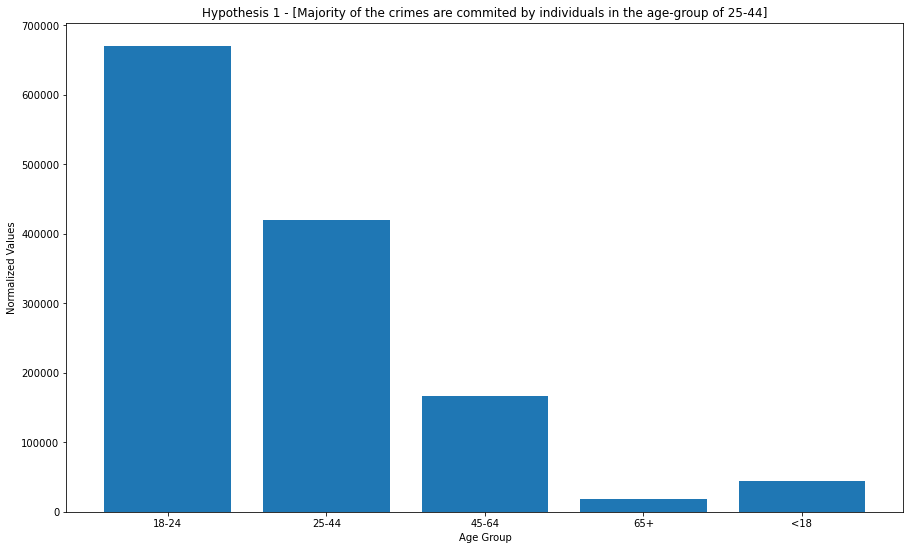

In [501]:
# Creating a plot to visualize the distribution of data (normalized values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = age_grouped_df['AGE_GROUP']
y = age_grouped_df['NORM_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 1 - [Majority of the crimes are commited by individuals in the age-group of 25-44]')
plt.xlabel('Age Group')
plt.ylabel('Normalized Values')
plt.show()

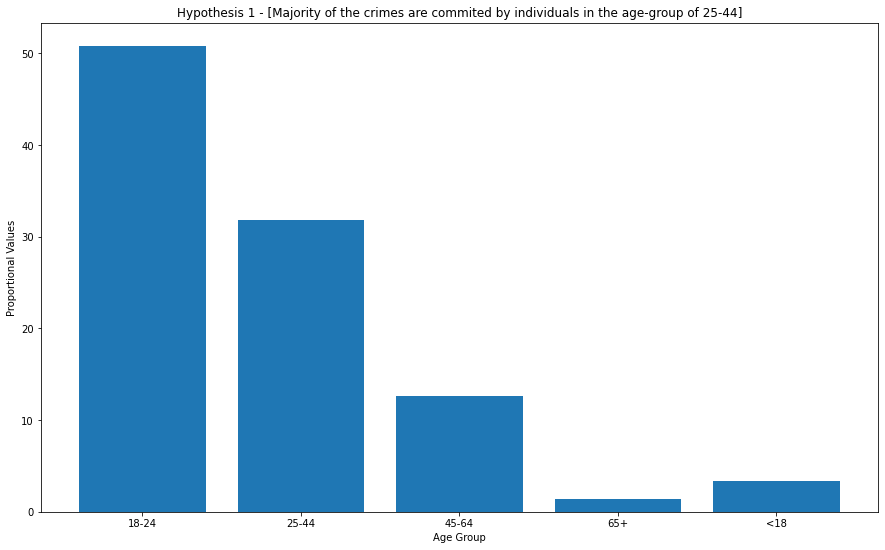

In [502]:
# Creating a plot to visualize the distribution of data by proportional analysis (proportional values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = age_grouped_df['AGE_GROUP']
y = age_grouped_df['PROP_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 1 - [Majority of the crimes are commited by individuals in the age-group of 25-44]')
plt.xlabel('Age Group')
plt.ylabel('Proportional Values')
plt.show()

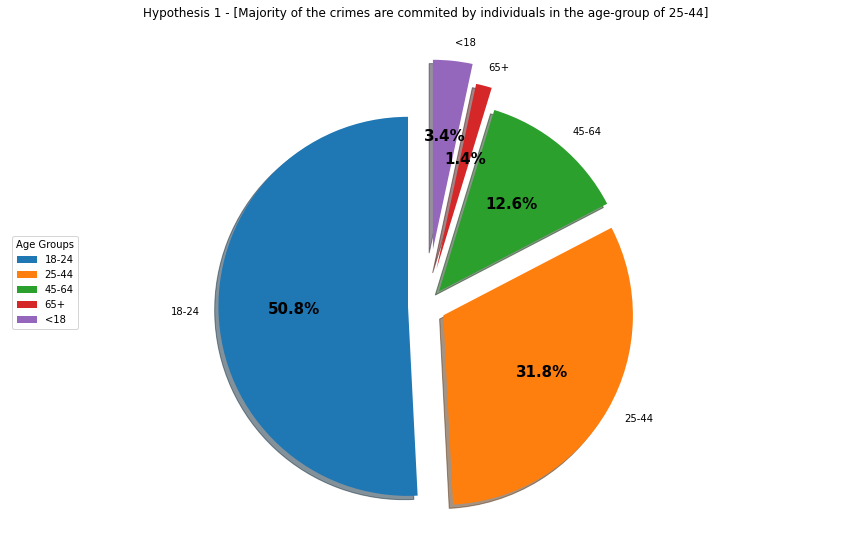

In [503]:
# A better representation of the above graph would be a pie chart. 
# Creating a pie-chart to conclude our analysis for this hypothesis. A pie-chart is a better representation for
# proportion of a whole 

labels = age_grouped_df['AGE_GROUP']
sizes = age_grouped_df['PROP_VALUES']
explode = (0.1, 0.1, 0.1, 0.2, 0.3)

fig1, ax1 = plt.subplots(figsize = (15,9))

wedges, texts, autotexts =  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

ax1.legend(wedges, labels,
          title="Age Groups",
          loc="center left")
  
plt.setp(autotexts, size = 15, weight = "bold") 
ax1.set_title("Hypothesis 1 - [Majority of the crimes are commited by individuals in the age-group of 25-44]\n") 

plt.show()

# Hypothesis 2

## Males are more likely to be frisked and arrested than females

### Frisking Data

In [504]:
# Reading the frisking data

stop_question_frisk = pd.read_excel('sqf-2019.xlsx')

In [505]:
# Preliminary analysis for stop_question_frisk data

preliminary_analysis(stop_question_frisk)

*** Rows and Columns in the Dataframe ***
Number of Instances (rows) : 13459
Number of Columns :  83
*** Column Names, Non-Null Count and Column Data Types***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 83 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   STOP_ID_ANONY                                               13459 non-null  int64         
 1   STOP_FRISK_DATE                                             13459 non-null  datetime64[ns]
 2   STOP_FRISK_TIME                                             13459 non-null  object        
 3   YEAR2                                                       13459 non-null  int64         
 4   MONTH2                                                      13459 non-null  object        
 5   DAY2                                                   

In [506]:
# Identifying frisking distribution of individuals by sex

stop_question_frisk.SUSPECT_SEX.value_counts()

MALE      12179
FEMALE     1230
(null)       50
Name: SUSPECT_SEX, dtype: int64

In [507]:
# Creating a copy of the data

sqf = stop_question_frisk.copy()

In [508]:
# Selecting only the required columns from the sqf dataset for this hypothesis    

sqf_frisk = sqf[sqf['FRISKED_FLAG'] == 'Y']
sqf_df = select_columns(sqf_frisk, 'SUSPECT_SEX')
sqf_df

,SUSPECT_SEX
0,MALE
4,MALE
5,MALE
7,MALE
9,MALE
...,...
13444,MALE
13447,MALE
13453,MALE
13455,MALE


In [509]:
# Using the sex_pct_col() function to determine what percentage of the population the sex groups represent in sqf dataset

sqf_sex_group_pct = sex_pct_col(sqf_df, 'SUSPECT_SEX')

sqf_sex_group_pct

,SUSPECT_SEX,POP_BY_SEX_PCT
0,MALE,0.4767
4,MALE,0.4767
5,MALE,0.4767
7,MALE,0.4767
9,MALE,0.4767
...,...,...
13444,MALE,0.4767
13447,MALE,0.4767
13453,MALE,0.4767
13455,MALE,0.4767


In [510]:
# Using the grouping_for_count() function to create a new dataframe 'sqf_sex_grouped_df' which consists of the count 
# of the sex groups

sqf_sex_grouped_df = grouping_for_count(sqf_sex_group_pct, col_to_groupby1='SUSPECT_SEX', col_to_groupby2='POP_BY_SEX_PCT', 
                                    col_for_count='SUSPECT_SEX')

sqf_sex_grouped_df

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT
0,FEMALE,0.5233,363
1,MALE,0.4767,7234


In [511]:
# Using the normalized_values() function to generate normalized value for the sqf_sex_grouped_df

normalized_values(sqf_sex_grouped_df, 'COUNT', 'POP_BY_SEX_PCT')

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES
0,FEMALE,0.5233,363,693
1,MALE,0.4767,7234,15175


In [512]:
# Using the proportional_values() function on sqf_sex_grouped_df to determine ratios

proportional_values(sqf_sex_grouped_df)

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES,PROP_VALUES
0,FEMALE,0.5233,363,693,4.37
1,MALE,0.4767,7234,15175,95.63


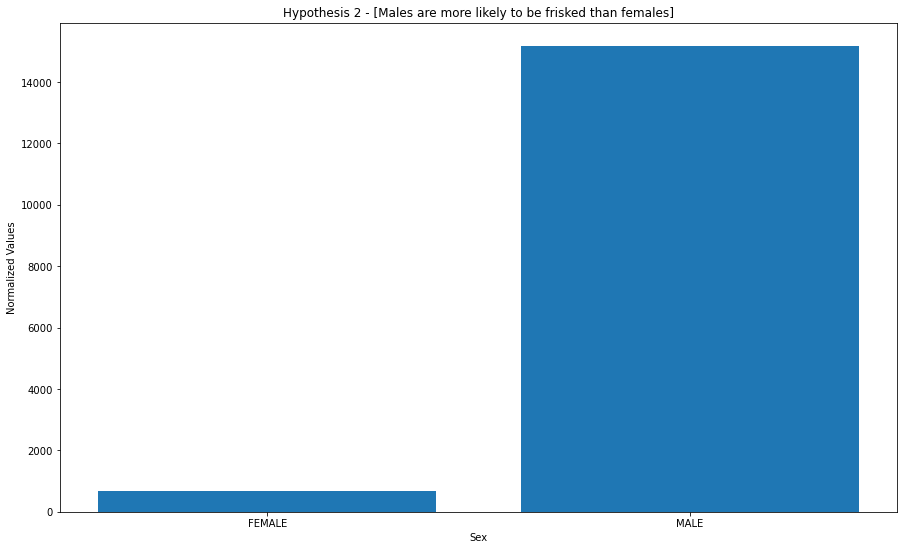

In [513]:
# Creating a plot to visualize the distribution of sqf data (normalized values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_sex_grouped_df['SUSPECT_SEX']
y = sqf_sex_grouped_df['NORM_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 2 - [Males are more likely to be frisked than females]')
plt.xlabel('Sex')
plt.ylabel('Normalized Values')
plt.show()

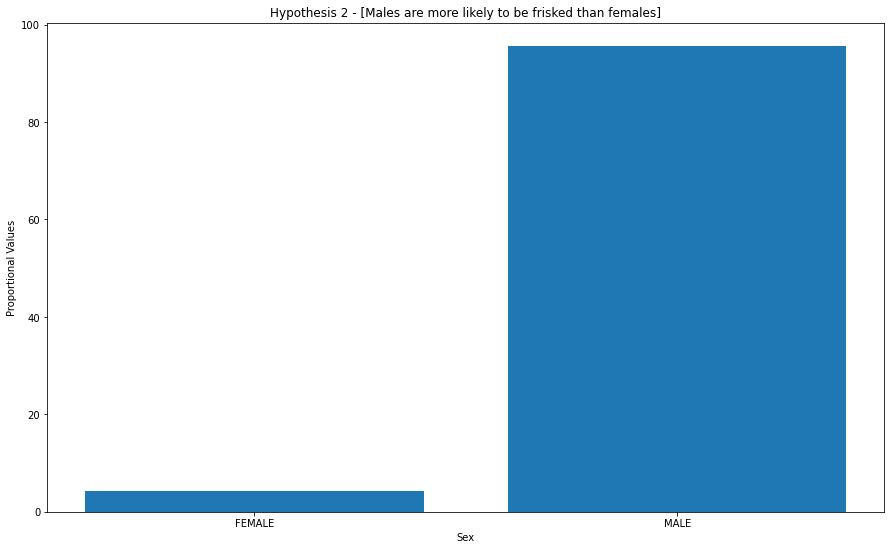

In [514]:
# Creating a plot to visualize the distribution of sqf data by proportional analysis (proportional values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_sex_grouped_df['SUSPECT_SEX']
y = sqf_sex_grouped_df['PROP_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 2 - [Males are more likely to be frisked than females]')
plt.xlabel('Sex')
plt.ylabel('Proportional Values')
plt.show()

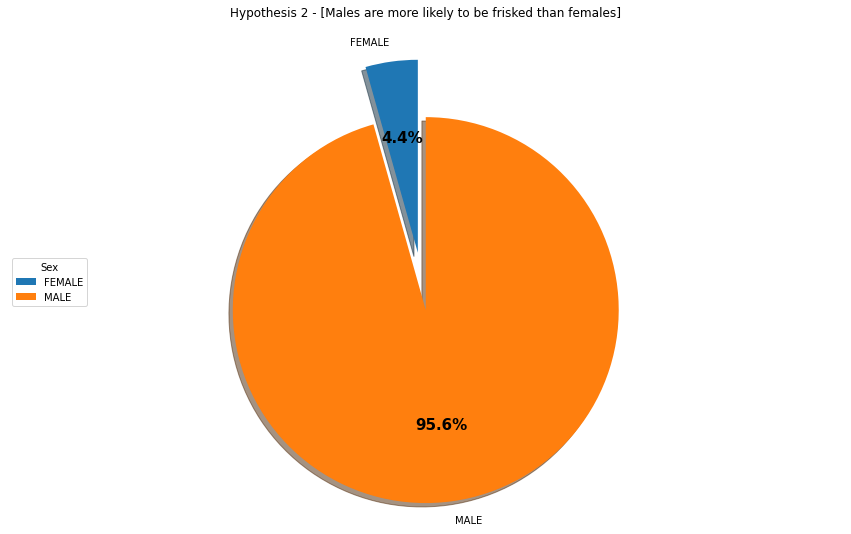

In [515]:
# A better representation of the above graph would be a pie chart. 
# Creating a pie-chart to conclude our analysis for on sqf data. A pie-chart is a better representation for
# proportion of a whole 

labels = sqf_sex_grouped_df['SUSPECT_SEX']
sizes = sqf_sex_grouped_df['PROP_VALUES']
explode = (0.1, 0.2)

fig1, ax1 = plt.subplots(figsize = (15,9))

wedges, texts, autotexts =  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

ax1.legend(wedges, labels,
          title="Sex",
          loc="center left")
  
plt.setp(autotexts, size = 15, weight = "bold") 
ax1.set_title("Hypothesis 2 - [Males are more likely to be frisked than females]\n") 

plt.show()

### Arrest Data

In [516]:
# Reading the arresting data

arrest = pd.read_csv('NYPD_Arrests_Data_2019.csv')

In [517]:
# Preliminary analysis for arrest data

preliminary_analysis(arrest)

*** Rows and Columns in the Dataframe ***
Number of Instances (rows) : 214617
Number of Columns :  19
*** Column Names, Non-Null Count and Column Data Types***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214617 entries, 0 to 214616
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         214617 non-null  int64  
 1   ARREST_DATE        214617 non-null  object 
 2   PD_CD              214576 non-null  float64
 3   PD_DESC            214458 non-null  object 
 4   KY_CD              214458 non-null  float64
 5   OFNS_DESC          214458 non-null  object 
 6   LAW_CODE           214617 non-null  object 
 7   LAW_CAT_CD         213248 non-null  object 
 8   ARREST_BORO        214617 non-null  object 
 9   ARREST_PRECINCT    214617 non-null  int64  
 10  JURISDICTION_CODE  214617 non-null  int64  
 11  AGE_GROUP          214617 non-null  object 
 12  PERP_SEX           214617 non-null  ob

In [518]:
# Identifying arrest distribution of individuals by sex

arrest.PERP_SEX.value_counts()

M    175317
F     39300
Name: PERP_SEX, dtype: int64

In [519]:
# Creating a copy of the data

arr = arrest.copy()

In [520]:
# Changing the value of 'M' to 'MALE' and 'F' to 'FEMALE' in 'PERP_SEX' column in the arrest data

arr["PERP_SEX"].replace({"M": "MALE", "F": "FEMALE"}, inplace=True)

In [521]:
# Selecting only the required columns from the arrest dataset for this hypothesis    

arr_df = select_columns(arr, 'PERP_SEX')
arr_df

,PERP_SEX
0,FEMALE
1,MALE
2,FEMALE
3,MALE
4,MALE
...,...
214612,MALE
214613,MALE
214614,FEMALE
214615,FEMALE


In [522]:
# Using the sex_pct_col() function to determine what percentage of the population the sex groups represent in arrest dataset

arr_sex_group_pct = sex_pct_col(arr_df, 'PERP_SEX')

arr_sex_group_pct

,PERP_SEX,POP_BY_SEX_PCT
0,FEMALE,0.5233
1,MALE,0.4767
2,FEMALE,0.5233
3,MALE,0.4767
4,MALE,0.4767
...,...,...
214612,MALE,0.4767
214613,MALE,0.4767
214614,FEMALE,0.5233
214615,FEMALE,0.5233


In [523]:
# Using the grouping_for_count() function to create a new dataframe 'arr_sex_grouped_df' which consists of the count 
# of the sex groups

arr_sex_grouped_df = grouping_for_count(arr_sex_group_pct, col_to_groupby1='PERP_SEX', col_to_groupby2='POP_BY_SEX_PCT', 
                                    col_for_count='PERP_SEX')

arr_sex_grouped_df

,PERP_SEX,POP_BY_SEX_PCT,COUNT
0,FEMALE,0.5233,39300
1,MALE,0.4767,175317


In [524]:
# Using the normalized_values() function to generate normalized value for the arr_sex_grouped_df

normalized_values(arr_sex_grouped_df, 'COUNT', 'POP_BY_SEX_PCT')

,PERP_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES
0,FEMALE,0.5233,39300,75100
1,MALE,0.4767,175317,367772


In [525]:
# Using the proportional_values() function on arr_sex_grouped_df to determine ratios

proportional_values(arr_sex_grouped_df)

,PERP_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES,PROP_VALUES
0,FEMALE,0.5233,39300,75100,16.96
1,MALE,0.4767,175317,367772,83.04


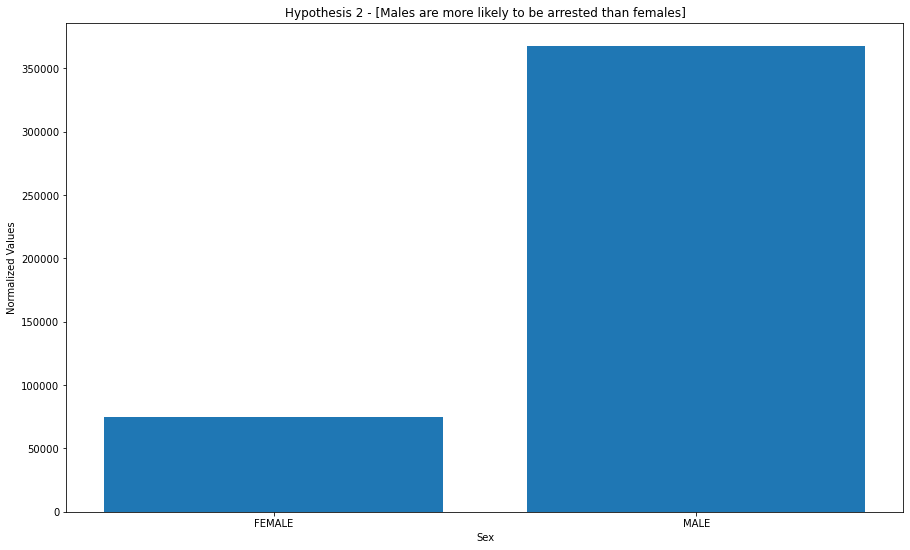

In [526]:
# Creating a plot to visualize the distribution of arrest data (normalized values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = arr_sex_grouped_df['PERP_SEX']
y = arr_sex_grouped_df['NORM_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 2 - [Males are more likely to be arrested than females]')
plt.xlabel('Sex')
plt.ylabel('Normalized Values')
plt.show()

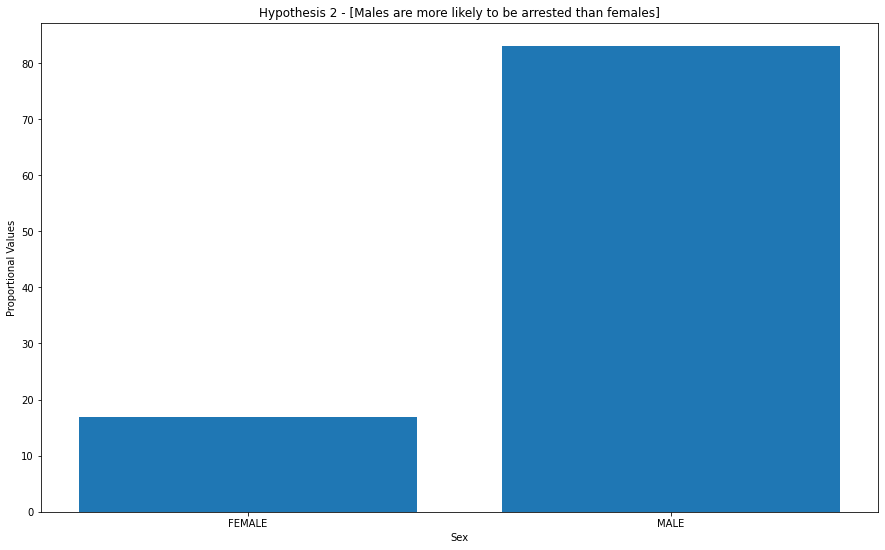

In [527]:
# Creating a plot to visualize the distribution of arrest data by proportional analysis (proportional values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = arr_sex_grouped_df['PERP_SEX']
y = arr_sex_grouped_df['PROP_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 2 - [Males are more likely to be arrested than females]')
plt.xlabel('Sex')
plt.ylabel('Proportional Values')
plt.show()

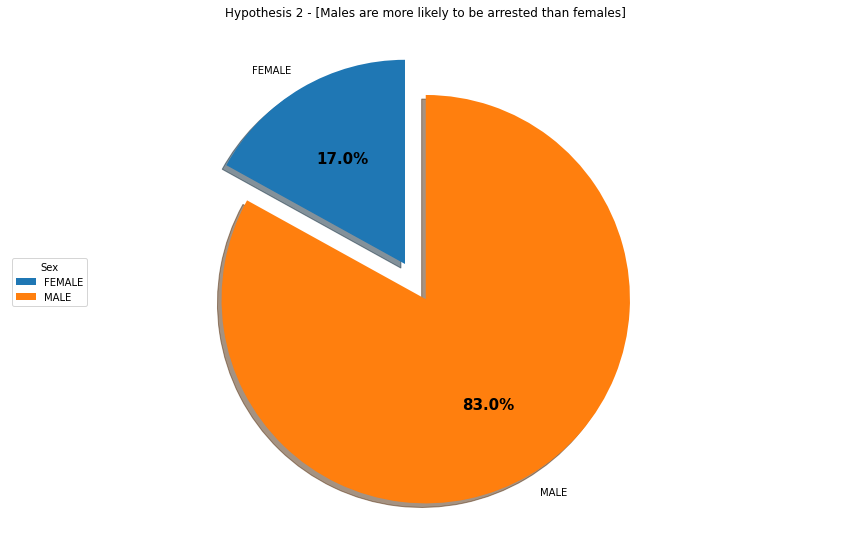

In [528]:
# A better representation of the above graph would be a pie chart. 
# Creating a pie-chart to conclude our analysis for on arrest data. A pie-chart is a better representation for
# proportion of a whole 

labels = arr_sex_grouped_df['PERP_SEX']
sizes = arr_sex_grouped_df['PROP_VALUES']
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots(figsize = (15,9))

wedges, texts, autotexts =  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

ax1.legend(wedges, labels,
          title="Sex",
          loc="center left")
  
plt.setp(autotexts, size = 15, weight = "bold") 
ax1.set_title("Hypothesis 2 - [Males are more likely to be arrested than females]\n") 

plt.show()

# Hypothesis 3

## Individuals of a particular race are more likely to be frisked and arrested than any other race

### Frisking Data

In [529]:
# Identifying distribution of individuals by race

stop_question_frisk.SUSPECT_RACE_DESCRIPTION.value_counts()

BLACK                        7981
WHITE HISPANIC               2742
WHITE                        1215
BLACK HISPANIC               1127
ASIAN / PACIFIC ISLANDER      301
(null)                         85
AMERICAN INDIAN/ALASKAN N       8
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [530]:
# Creating a copy of the data

sqf = stop_question_frisk.copy()

In [531]:
# Selecting only the required columns from the sqf dataset for this hypothesis    

sqf_frisk = sqf[sqf['FRISKED_FLAG'] == 'Y']
sqf_race_df = select_columns(sqf_frisk, 'SUSPECT_RACE_DESCRIPTION')
sqf_race_df

,SUSPECT_RACE_DESCRIPTION
0,BLACK
4,BLACK
5,BLACK
7,BLACK HISPANIC
9,BLACK
...,...
13444,WHITE HISPANIC
13447,BLACK
13453,BLACK
13455,BLACK


In [532]:
# Using the race_pct_col() function to determine what percentage of the population the race groups represent

sqf_race_group_pct = race_pct_col(sqf_race_df, 'SUSPECT_RACE_DESCRIPTION')

sqf_race_group_pct

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT
0,BLACK,0.2195
4,BLACK,0.2195
5,BLACK,0.2195
7,BLACK HISPANIC,0.0233
9,BLACK,0.2195
...,...,...
13444,WHITE HISPANIC,0.1053
13447,BLACK,0.2195
13453,BLACK,0.2195
13455,BLACK,0.2195


In [533]:
# Using the grouping_for_count() function to create a new dataframe 'sqf_race_grouped_df' which consists of the count 
# of the racial groups

sqf_race_grouped_df = grouping_for_count(sqf_race_group_pct, col_to_groupby1='SUSPECT_RACE_DESCRIPTION', col_to_groupby2='POP_BY_RACE_PCT', 
                                    col_for_count='SUSPECT_RACE_DESCRIPTION')

sqf_race_grouped_df

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT
0,(null),0.1862,52
1,ASIAN / PACIFIC ISLANDER,0.1400,145
2,BLACK,0.2195,4626
3,BLACK HISPANIC,0.0233,686
4,WHITE,0.3214,528
5,WHITE HISPANIC,0.1053,1584


In [534]:
# Using the normalized_values() function to generate normalized value for the race_grouped_df

normalized_values(sqf_race_grouped_df, 'COUNT', 'POP_BY_RACE_PCT')

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES
0,(null),0.1862,52,279
1,ASIAN / PACIFIC ISLANDER,0.1400,145,1035
2,BLACK,0.2195,4626,21075
3,BLACK HISPANIC,0.0233,686,29442
4,WHITE,0.3214,528,1642
5,WHITE HISPANIC,0.1053,1584,15042


In [535]:
# Using the proportional_values() function on sqf_race_grouped_df to determine ratios

proportional_values(sqf_race_grouped_df)

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES,PROP_VALUES
0,(null),0.1862,52,279,0.41
1,ASIAN / PACIFIC ISLANDER,0.1400,145,1035,1.51
2,BLACK,0.2195,4626,21075,30.76
3,BLACK HISPANIC,0.0233,686,29442,42.97
4,WHITE,0.3214,528,1642,2.40
5,WHITE HISPANIC,0.1053,1584,15042,21.95


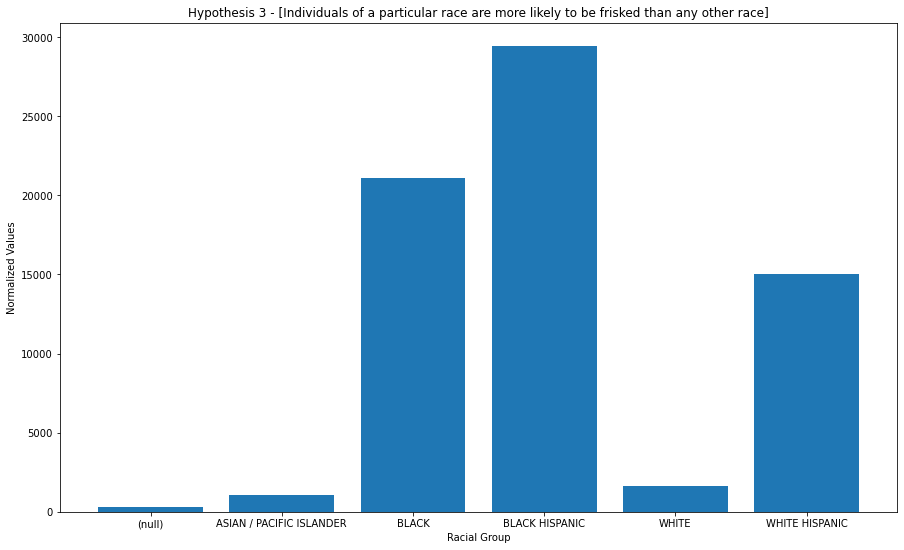

In [536]:
# Creating a plot to visualize the distribution of sqf data (normalized values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_race_grouped_df['SUSPECT_RACE_DESCRIPTION']
y = sqf_race_grouped_df['NORM_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 3 - [Individuals of a particular race are more likely to be frisked than any other race]')
plt.xlabel('Racial Group')
plt.ylabel('Normalized Values')
plt.show()

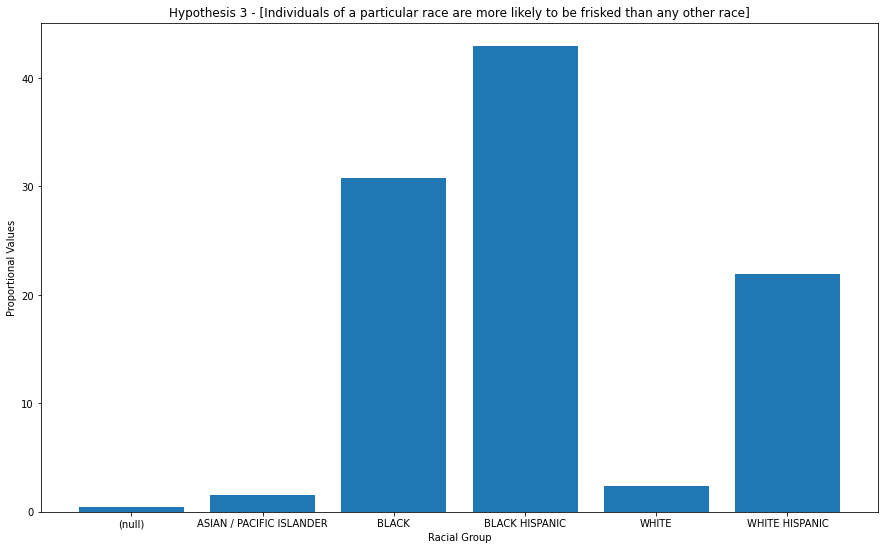

In [537]:
# Creating a plot to visualize the distribution of sqf data by proportional analysis (proportional values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_race_grouped_df['SUSPECT_RACE_DESCRIPTION']
y = sqf_race_grouped_df['PROP_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 3 - [Individuals of a particular race are more likely to be frisked than any other race]')
plt.xlabel('Racial Group')
plt.ylabel('Proportional Values')
plt.show()

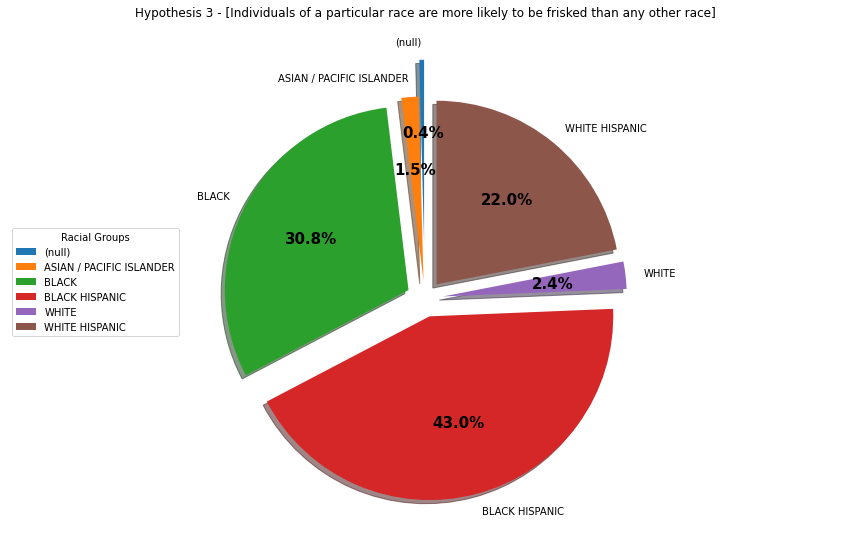

In [538]:
# A better representation of the above graph would be a pie chart. 
# Creating a pie-chart to conclude our analysis for this hypothesis. A pie-chart is a better representation for
# proportion of a whole 

labels = sqf_race_grouped_df['SUSPECT_RACE_DESCRIPTION']
sizes = sqf_race_grouped_df['PROP_VALUES']
explode = (0.3, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize = (15,9))

wedges, texts, autotexts =  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

ax1.legend(wedges, labels,
          title="Racial Groups",
          loc="center left")
  
plt.setp(autotexts, size = 15, weight = "bold") 
ax1.set_title("Hypothesis 3 - [Individuals of a particular race are more likely to be frisked than any other race]\n") 

plt.show()

## Arrests Data

In [539]:
arrest.PERP_RACE.value_counts()

BLACK                             102585
WHITE HISPANIC                     53675
WHITE                              25478
BLACK HISPANIC                     18755
ASIAN / PACIFIC ISLANDER           12104
UNKNOWN                             1423
AMERICAN INDIAN/ALASKAN NATIVE       597
Name: PERP_RACE, dtype: int64

In [540]:
# Creating a copy of the data

arr = arrest.copy()

In [541]:
# Selecting only the required columns from the arrest dataset for this hypothesis    

arr_race_df = select_columns(arr, 'PERP_RACE')
arr_race_df

,PERP_RACE
0,WHITE HISPANIC
1,WHITE HISPANIC
2,BLACK HISPANIC
3,WHITE HISPANIC
4,WHITE
...,...
214612,WHITE HISPANIC
214613,BLACK
214614,WHITE
214615,BLACK


In [542]:
# Using the race_pct_col() function to determine what percentage of the population the race groups represent

arr_race_group_pct = race_pct_col(arr_race_df, 'PERP_RACE')

arr_race_group_pct

,PERP_RACE,POP_BY_RACE_PCT
0,WHITE HISPANIC,0.1053
1,WHITE HISPANIC,0.1053
2,BLACK HISPANIC,0.0233
3,WHITE HISPANIC,0.1053
4,WHITE,0.3214
...,...,...
214612,WHITE HISPANIC,0.1053
214613,BLACK,0.2195
214614,WHITE,0.3214
214615,BLACK,0.2195


In [543]:
# Using the grouping_for_count() function to create a new dataframe 'arr_race_grouped_df' which consists of the count 
# of the racial groups

arr_race_grouped_df = grouping_for_count(arr_race_group_pct, col_to_groupby1='PERP_RACE', col_to_groupby2='POP_BY_RACE_PCT', 
                                    col_for_count='PERP_RACE')

arr_race_grouped_df

,PERP_RACE,POP_BY_RACE_PCT,COUNT
0,AMERICAN INDIAN/ALASKAN NATIVE,0.0043,597
1,ASIAN / PACIFIC ISLANDER,0.1400,12104
2,BLACK,0.2195,102585
3,BLACK HISPANIC,0.0233,18755
4,UNKNOWN,0.1862,1423
5,WHITE,0.3214,25478
6,WHITE HISPANIC,0.1053,53675


In [544]:
# Using the normalized_values() function to generate normalized value for the race_grouped_df

normalized_values(arr_race_grouped_df, 'COUNT', 'POP_BY_RACE_PCT')

,PERP_RACE,POP_BY_RACE_PCT,COUNT,NORM_VALUES
0,AMERICAN INDIAN/ALASKAN NATIVE,0.0043,597,138837
1,ASIAN / PACIFIC ISLANDER,0.1400,12104,86457
2,BLACK,0.2195,102585,467357
3,BLACK HISPANIC,0.0233,18755,804935
4,UNKNOWN,0.1862,1423,7642
5,WHITE,0.3214,25478,79271
6,WHITE HISPANIC,0.1053,53675,509734


In [545]:
# Using the proportional_values() function on arr_race_grouped_df to determine ratios

proportional_values(arr_race_grouped_df)

,PERP_RACE,POP_BY_RACE_PCT,COUNT,NORM_VALUES,PROP_VALUES
0,AMERICAN INDIAN/ALASKAN NATIVE,0.0043,597,138837,6.63
1,ASIAN / PACIFIC ISLANDER,0.1400,12104,86457,4.13
2,BLACK,0.2195,102585,467357,22.32
3,BLACK HISPANIC,0.0233,18755,804935,38.44
4,UNKNOWN,0.1862,1423,7642,0.36
5,WHITE,0.3214,25478,79271,3.79
6,WHITE HISPANIC,0.1053,53675,509734,24.34


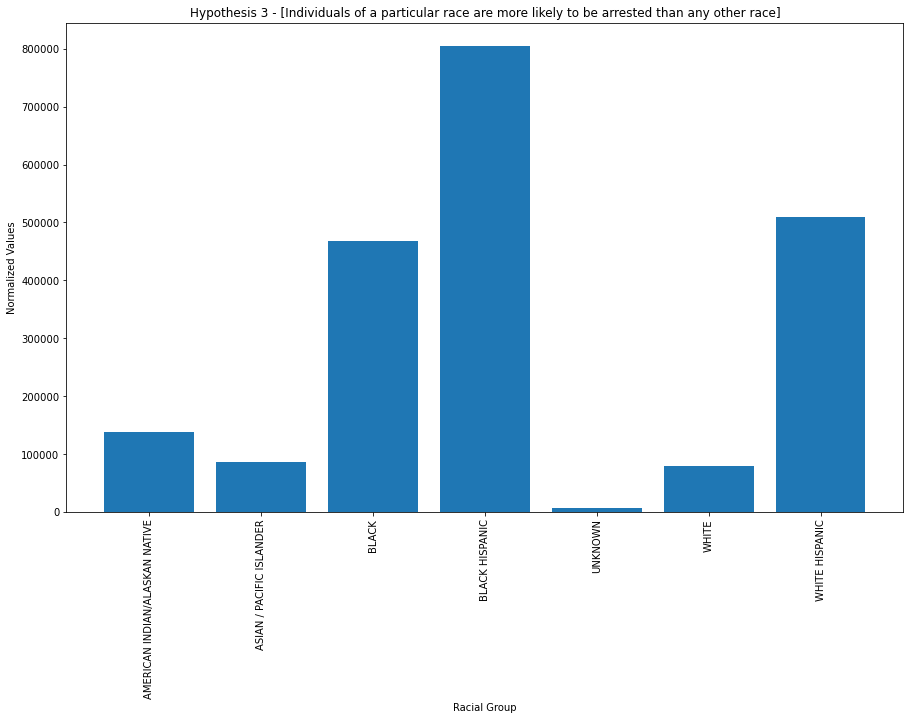

In [546]:
# Creating a plot to visualize the distribution of arrest data (normalized values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = arr_race_grouped_df['PERP_RACE']
y = arr_race_grouped_df['NORM_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 3 - [Individuals of a particular race are more likely to be arrested than any other race]')
plt.xlabel('Racial Group')
plt.ylabel('Normalized Values')
plt.xticks(rotation=90)
plt.show()

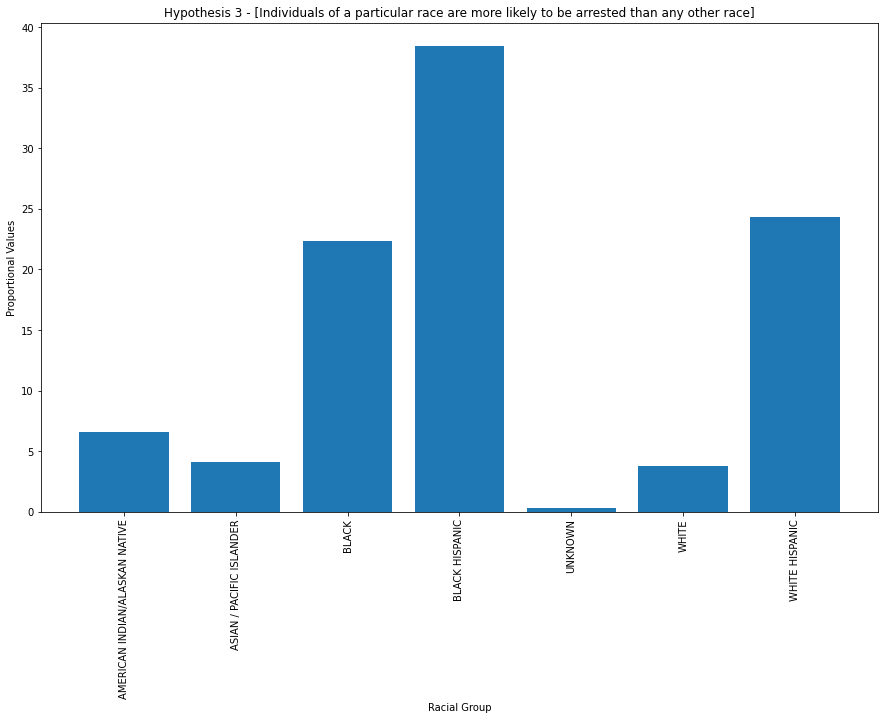

In [547]:
# Creating a plot to visualize the distribution of arrest data by proportional analysis (proportional values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = arr_race_grouped_df['PERP_RACE']
y = arr_race_grouped_df['PROP_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 3 - [Individuals of a particular race are more likely to be arrested than any other race]')
plt.xlabel('Racial Group')
plt.ylabel('Proportional Values')
plt.xticks(rotation=90)
plt.show()

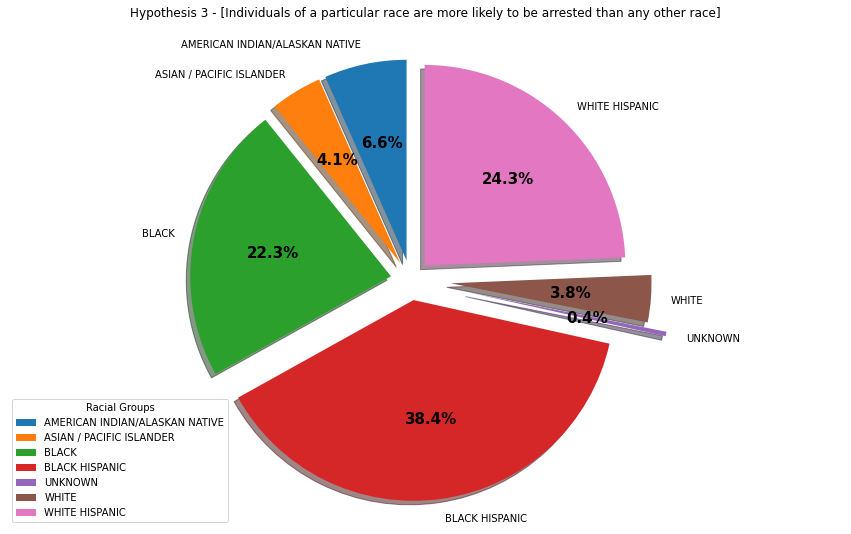

In [548]:
# A better representation of the above graph would be a pie chart. 
# Creating a pie-chart to conclude our analysis for this hypothesis. A pie-chart is a better representation for
# proportion of a whole 

labels = arr_race_grouped_df['PERP_RACE']
sizes = arr_race_grouped_df['PROP_VALUES']
explode = (0.1, 0.1, 0.1, 0.1, 0.3, 0.2, 0.1)

fig1, ax1 = plt.subplots(figsize = (15,9))

wedges, texts, autotexts =  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

ax1.legend(wedges, labels,
          title="Racial Groups",
          loc="lower left")
  
plt.setp(autotexts, size = 15, weight = "bold") 
ax1.set_title("Hypothesis 3 - [Individuals of a particular race are more likely to be arrested than any other race]\n") 

plt.show()

# Hypothesis 4

## 

In [549]:
# Reading the complaint data

complaint = pd.read_csv('NYPD_Complaint_Data_Historic_2019.csv')

In [550]:
# Preliminary analysis for complaint data

preliminary_analysis(complaint)

*** Rows and Columns in the Dataframe ***
Number of Instances (rows) : 450976
Number of Columns :  35
*** Column Names, Non-Null Count and Column Data Types***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450976 entries, 0 to 450975
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         450976 non-null  int64  
 1   CMPLNT_FR_DT       450976 non-null  object 
 2   CMPLNT_FR_TM       450976 non-null  object 
 3   CMPLNT_TO_DT       394679 non-null  object 
 4   CMPLNT_TO_TM       394912 non-null  object 
 5   ADDR_PCT_CD        450976 non-null  int64  
 6   RPT_DT             450976 non-null  object 
 7   KY_CD              450976 non-null  int64  
 8   OFNS_DESC          450968 non-null  object 
 9   PD_CD              450684 non-null  float64
 10  PD_DESC            450684 non-null  object 
 11  CRM_ATPT_CPTD_CD   450976 non-null  object 
 12  LAW_CAT_CD         450976 non-null  ob

In [551]:
# Creating a copy of the data

comp = complaint.copy()

In [552]:
# Changing the date columns into datetime object

comp['CMPLNT_FR_DT'] =  pd.to_datetime(comp['CMPLNT_FR_DT'], format='%m/%d/%Y')
comp['CMPLNT_TO_DT'] =  pd.to_datetime(comp['CMPLNT_TO_DT'], format='%m/%d/%Y')
comp['RPT_DT'] =  pd.to_datetime(comp['RPT_DT'], format='%m/%d/%Y')

comp.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,894386865,2019-01-01,10:00:00,2019-12-27,09:06:00,70,2019-12-27,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,U,NaN,40.620410,-73.960486,"(40.620410148000076, -73.96048582799995)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
1,921926672,2019-01-01,00:01:00,2019-09-11,23:59:00,110,2019-12-31,109,GRAND LARCENY,424.0,...,U,NaN,40.733927,-73.871582,"(40.73392684100003, -73.87158239799999)",PATROL BORO QUEENS NORTH,NaN,45-64,BLACK HISPANIC,M
2,548795490,2019-01-01,10:00:00,2019-12-27,10:00:00,70,2019-12-27,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,U,NaN,40.628220,-73.962913,"(40.62821988800005, -73.96291294199995)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
3,287029243,2019-01-01,10:00:00,2019-12-27,08:40:00,70,2019-12-27,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,U,NaN,40.654215,-73.959576,"(40.65421463600006, -73.95957562499996)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,D
4,139970812,2019-01-01,01:01:00,NaT,NaN,105,2019-11-03,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.666411,-73.740103,"(40.666411423000056, -73.74010315599998)",PATROL BORO QUEENS SOUTH,NaN,UNKNOWN,UNKNOWN,E


In [553]:
# Selecting the required columns

comp_req = comp[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'RPT_DT']]

In [554]:
# Selecting only the required columns from the complaint dataset for this hypothesis    

comp_req = select_columns(comp, 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'RPT_DT')
comp_req

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT
0,894386865,2019-01-01,2019-12-27
1,921926672,2019-01-01,2019-12-31
2,548795490,2019-01-01,2019-12-27
3,287029243,2019-01-01,2019-12-27
4,139970812,2019-01-01,2019-11-03
...,...,...,...
450971,947831880,2019-12-31,2019-12-31
450972,167545117,2019-12-31,2019-12-31
450973,501183351,2019-12-31,2019-12-31
450974,142572357,2019-12-31,2019-12-31


In [555]:
# Calculating the difference between the date of crime occurence and date when the event was reported to the police

# Days
comp_req['DIFF_DAYS'] = comp_req['RPT_DT'] - comp_req['CMPLNT_FR_DT']

# Weeks
comp_req['DIFF_WEEKS'] = round(comp_req['DIFF_DAYS']/np.timedelta64(1,'W'))

# Months
comp_req['DIFF_MONTHS'] = round(comp_req['DIFF_DAYS']/np.timedelta64(1,'M'))

In [556]:
# Changing the data type of some columns

comp_req.DIFF_WEEKS = comp_req.DIFF_WEEKS.astype(int)
comp_req.DIFF_MONTHS = comp_req.DIFF_MONTHS.astype(int)

comp_req.head()

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT,DIFF_DAYS,DIFF_WEEKS,DIFF_MONTHS
0,894386865,2019-01-01,2019-12-27,360 days,51,12
1,921926672,2019-01-01,2019-12-31,364 days,52,12
2,548795490,2019-01-01,2019-12-27,360 days,51,12
3,287029243,2019-01-01,2019-12-27,360 days,51,12
4,139970812,2019-01-01,2019-11-03,306 days,44,10


In [557]:
# Identifying distribution of number of crimes reported weeks after the crime occured

comp_req.DIFF_WEEKS.value_counts()

0     395290
1      25608
2       8573
3       4891
4       3566
5       2250
6       1624
7       1209
8       1030
9        888
10       697
11       635
13       549
12       539
14       424
15       324
16       272
17       257
18       196
19       179
22       175
24       172
23       163
20       155
21       144
26       109
25        97
28        83
27        79
29        79
32        77
30        68
31        64
39        60
38        41
42        41
35        41
36        38
37        38
33        38
34        36
43        32
44        31
40        28
45        19
41        19
51        13
48        11
49        10
46         8
50         3
47         2
52         1
Name: DIFF_WEEKS, dtype: int64

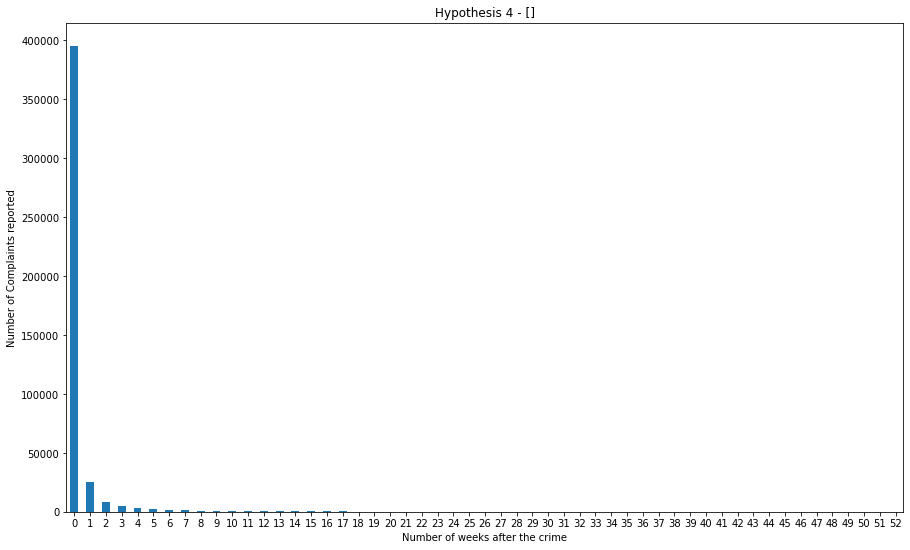

In [558]:
# Plotting the number of crimes reported vs weeks after the crime occured

fig, ax = plt.subplots(1,1, figsize = (15,9))

comp_req['DIFF_WEEKS'].value_counts().sort_index(ascending=True).plot(kind='bar', rot=0)

ax.set_title('Hypothesis 4 - []')
plt.xlabel('Number of weeks after the crime')
plt.ylabel('Number of Complaints reported')
plt.show()

In [559]:
# Identifying distribution of number of crimes reported months after the crime occured

comp_req.DIFF_MONTHS.value_counts()

0     427670
1      14132
2       4100
3       2105
4        994
5        711
6        444
7        313
8        168
9        167
10       125
11        30
12        17
Name: DIFF_MONTHS, dtype: int64

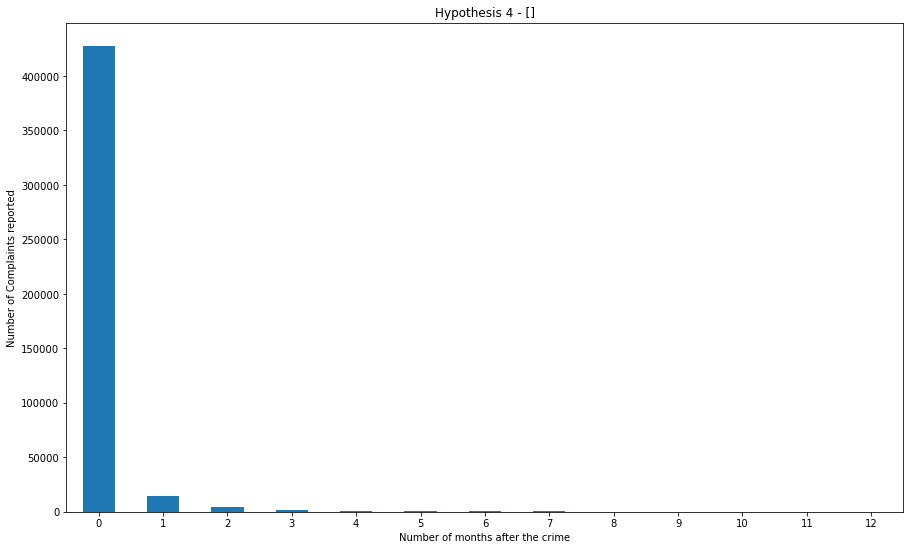

In [560]:
# Plotting the number of crimes reported vs months after the crime occured

fig, ax = plt.subplots(1,1, figsize = (15,9))

comp_req['DIFF_MONTHS'].value_counts().sort_index(ascending=True).plot(kind='bar', rot=0)

ax.set_title('Hypothesis 4 - []')
plt.xlabel('Number of months after the crime')
plt.ylabel('Number of Complaints reported')
plt.show()